In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/UMESH/Downloads/Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

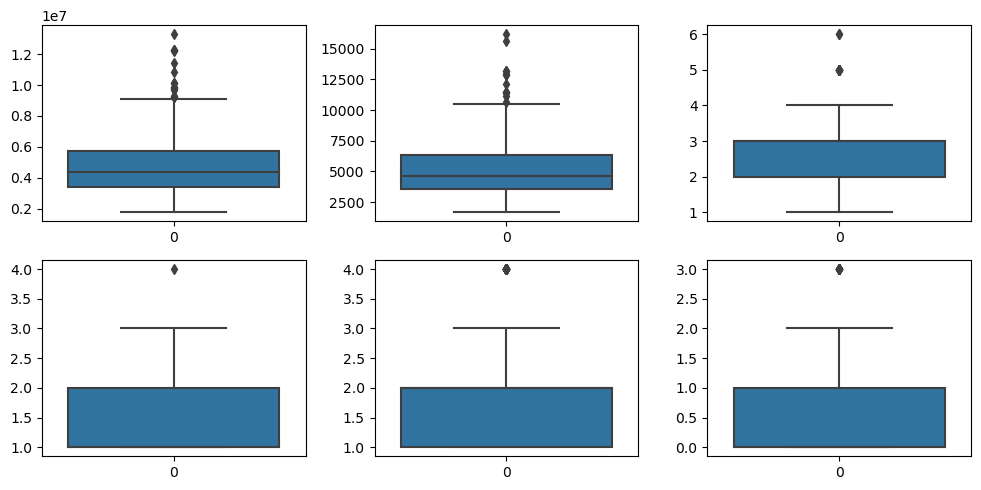

In [15]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()


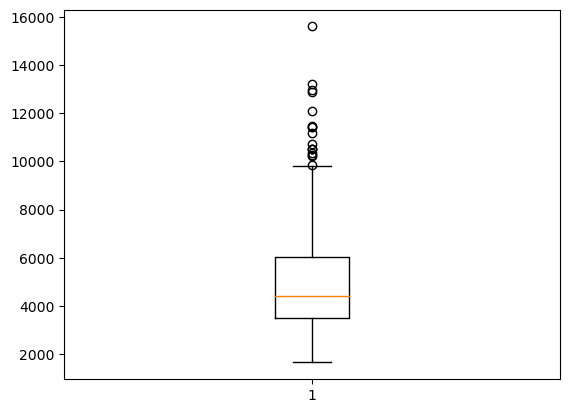

In [23]:
# outlier treatment for area
plt.boxplot(df.area)
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

C:\Users\UMESH\anaconda3.x\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


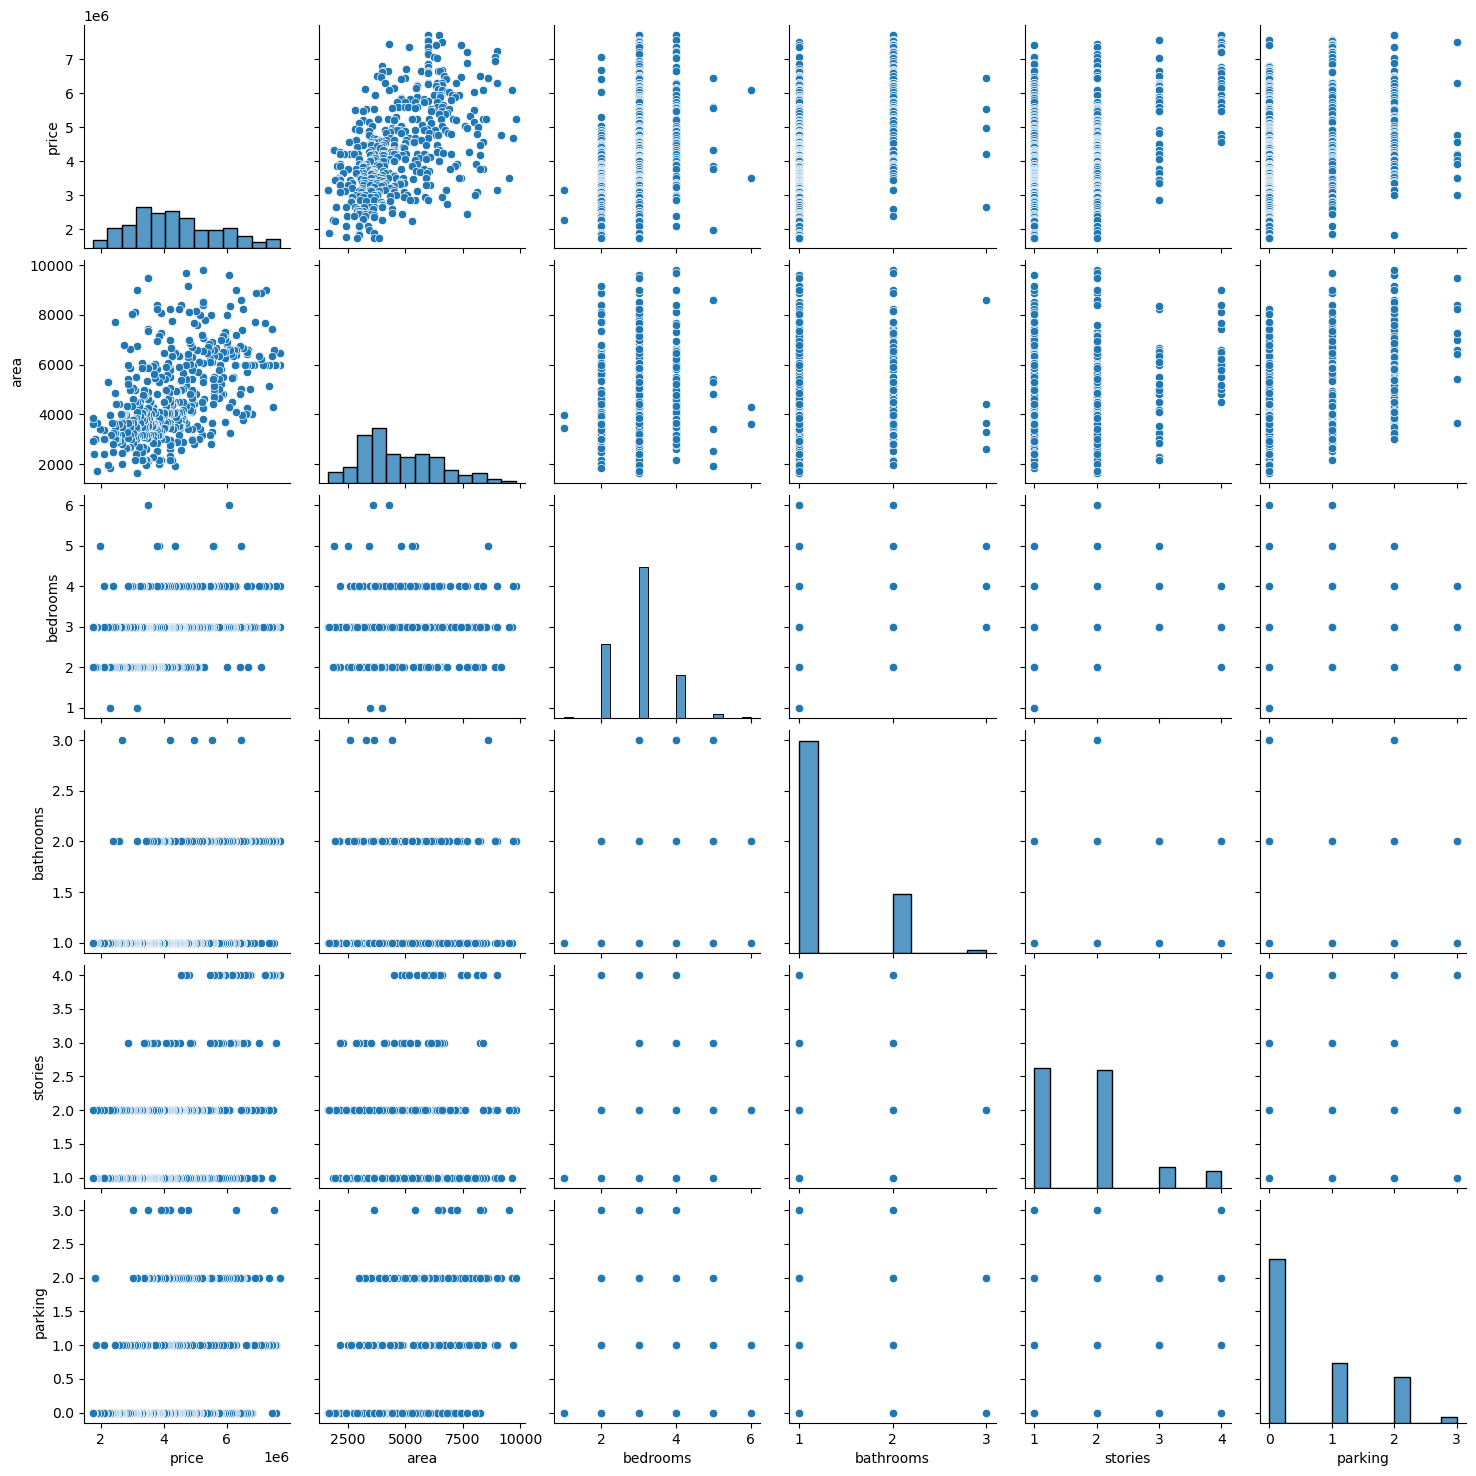

In [27]:
sns.pairplot(df)
plt.show()

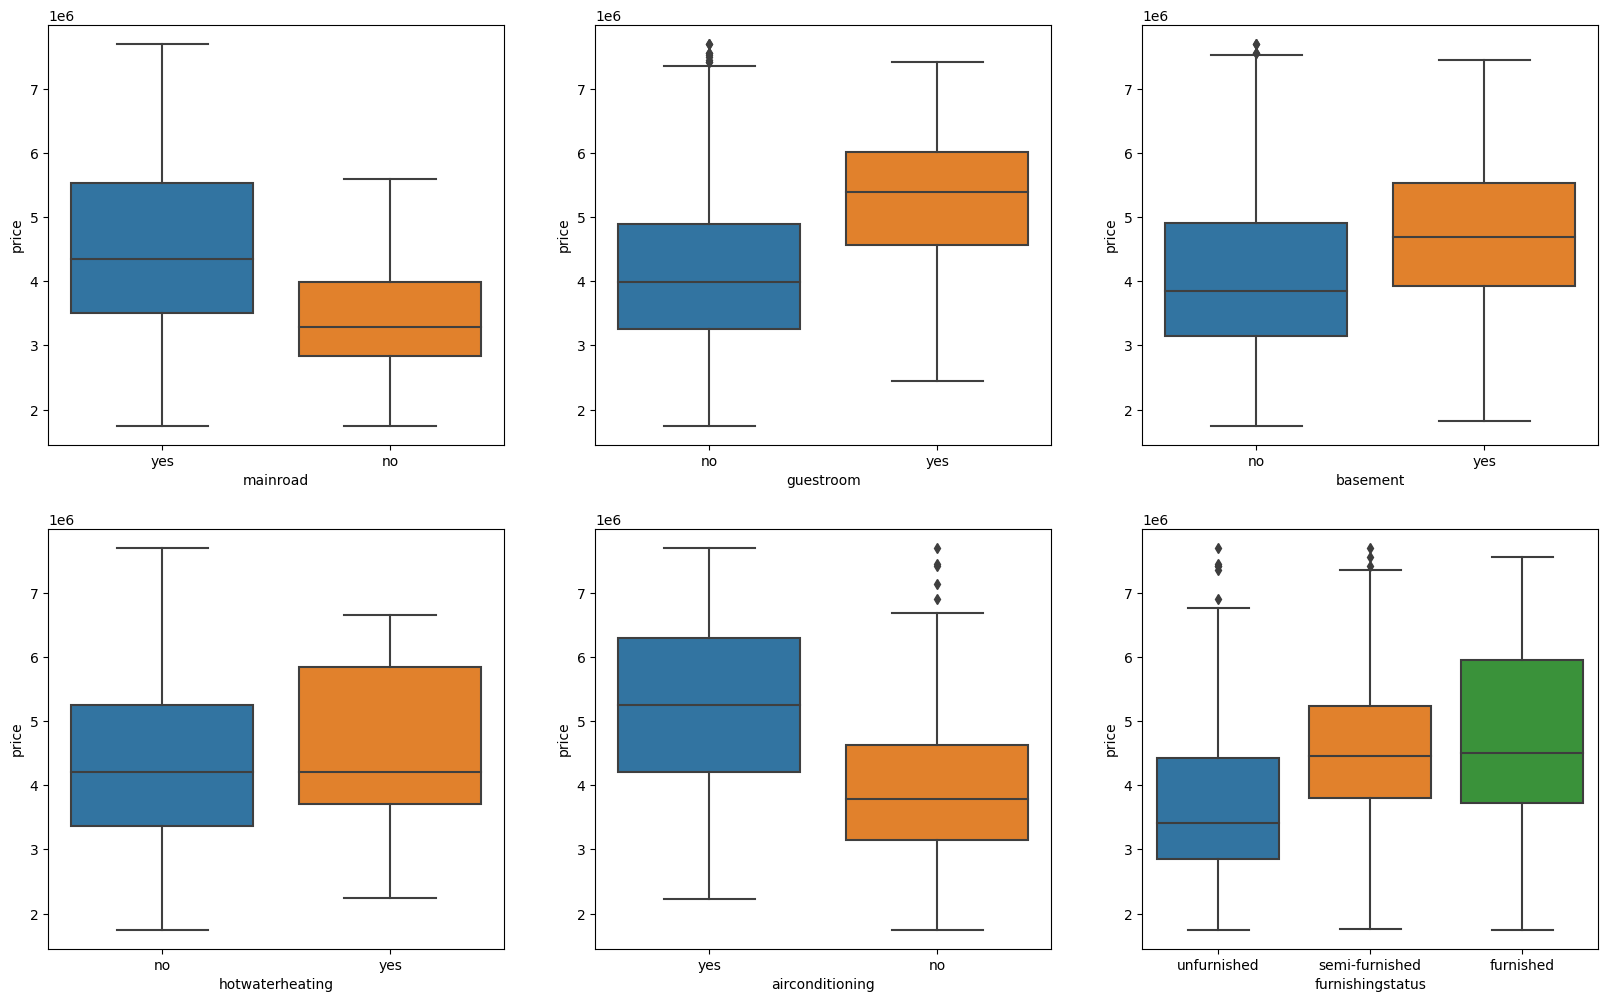

In [28]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = df)
plt.show()

In [29]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

df[varlist] = df[varlist].apply(binary_map)

In [30]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
42,7700000,6480,3,2,4,1,0,0,0,1,2,0,unfurnished
43,7700000,6000,4,2,4,1,0,0,0,0,2,0,semi-furnished
44,7560000,6000,4,2,4,1,0,0,0,1,1,0,furnished
45,7560000,6000,3,2,3,1,0,0,0,1,0,0,semi-furnished
46,7525000,6000,3,2,4,1,0,0,0,1,1,0,furnished


In [31]:
status = pd.get_dummies(df['furnishingstatus'])

In [32]:
status.head()

,furnished,semi-furnished,unfurnished
42,False,False,True
43,False,True,False
44,True,False,False
45,False,True,False
46,True,False,False


In [33]:
status = pd.get_dummies(df['furnishingstatus'], drop_first = True)
df = pd.concat([df, status], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
42,7700000,6480,3,2,4,1,0,0,0,1,2,0,unfurnished,False,True
43,7700000,6000,4,2,4,1,0,0,0,0,2,0,semi-furnished,True,False
44,7560000,6000,4,2,4,1,0,0,0,1,1,0,furnished,False,False
45,7560000,6000,3,2,3,1,0,0,0,1,0,0,semi-furnished,True,False
46,7525000,6000,3,2,4,1,0,0,0,1,1,0,furnished,False,False


In [34]:
df.drop(['furnishingstatus'], axis = 1, inplace = True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
42,7700000,6480,3,2,4,1,0,0,0,1,2,0,False,True
43,7700000,6000,4,2,4,1,0,0,0,0,2,0,True,False
44,7560000,6000,4,2,4,1,0,0,0,1,1,0,False,False
45,7560000,6000,3,2,3,1,0,0,0,1,0,0,True,False
46,7525000,6000,3,2,4,1,0,0,0,1,1,0,False,False


In [35]:
from sklearn.model_selection import train_test_split

# specifying this so that the train and test data set always have the same rows
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
     
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [36]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
47,0.964706,0.604938,0.4,0.0,1.000000,1,0,0,0,1,1.000000,1,False,False
315,0.394118,0.481481,0.2,0.0,0.000000,1,0,0,0,1,0.000000,0,True,False
313,0.394118,0.244444,0.4,0.5,0.333333,1,0,0,0,0,0.000000,0,True,False
231,0.494118,0.323457,0.4,0.0,0.000000,1,0,0,0,0,0.000000,1,True,False
179,0.582353,0.182716,0.4,0.5,0.333333,1,0,0,0,0,0.666667,0,True,False


In [40]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,0.437239,0.376158,0.384706,0.116176,0.260784,0.844118,0.173529,0.355882,0.032353,0.294118,0.202941,0.208824
std,0.222211,0.208929,0.145741,0.228249,0.289607,0.363278,0.379262,0.479485,0.177196,0.456317,0.273950,0.407067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.275000,0.222222,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.411765,0.327284,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.588235,0.530864,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


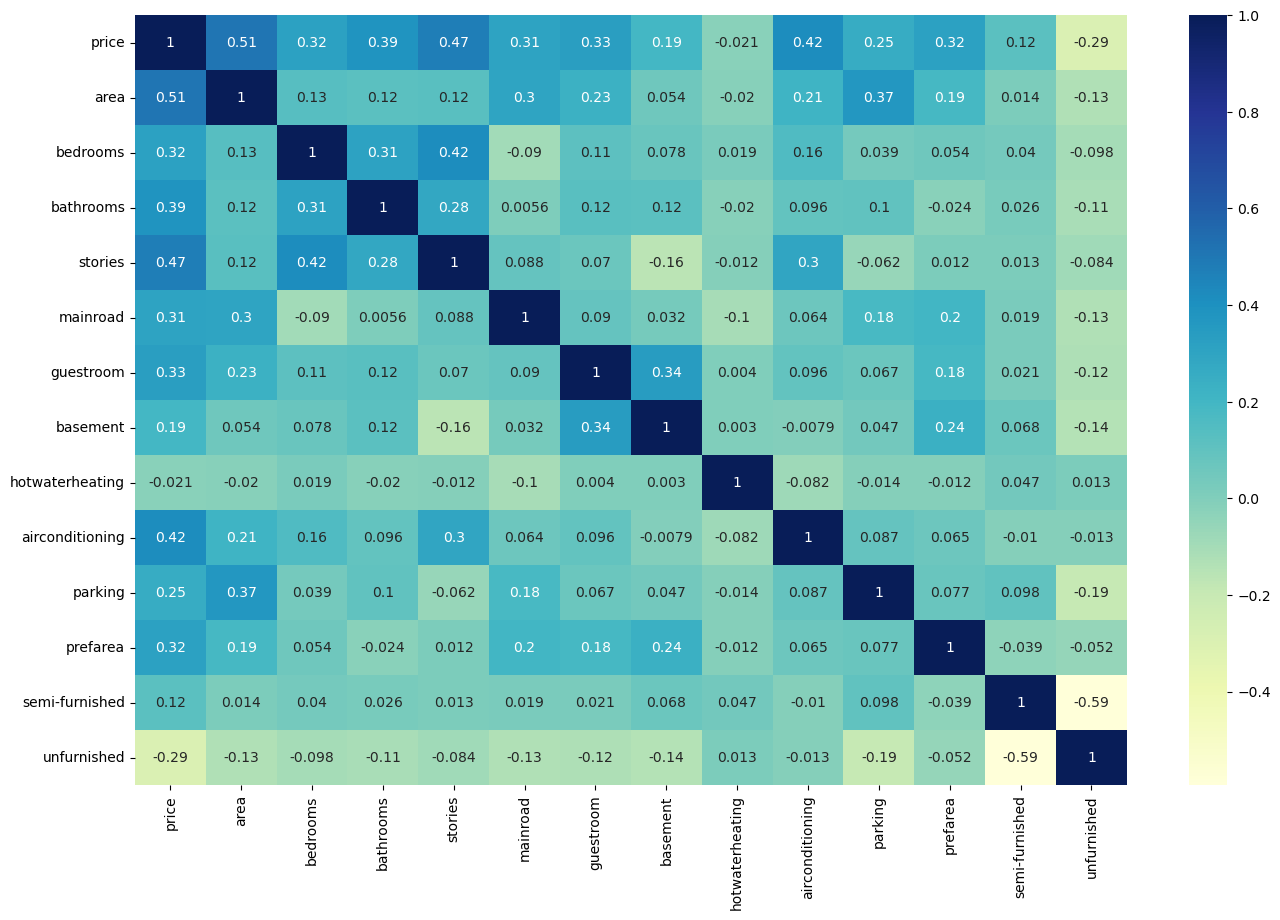

In [39]:
# heatmap to visualize the correlation matrix of this DataFrame
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [43]:
y_train = df_train.pop('price')
X_train = df_train
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=LinearRegression(), n_features_to_select=6)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 6),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 3),
 ('guestroom', False, 2),
 ('basement', False, 5),
 ('hotwaterheating', False, 7),
 ('airconditioning', True, 1),
 ('parking', False, 4),
 ('prefarea', True, 1),
 ('semi-furnished', False, 8),
 ('unfurnished', True, 1)]

In [71]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'airconditioning', 'prefarea',
       'unfurnished'],
      dtype='object')

In [72]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'parking', 'semi-furnished'],
      dtype='object')

C:\Users\UMESH\AppData\Local\Temp\ipykernel_15448\4121916989.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins=20)


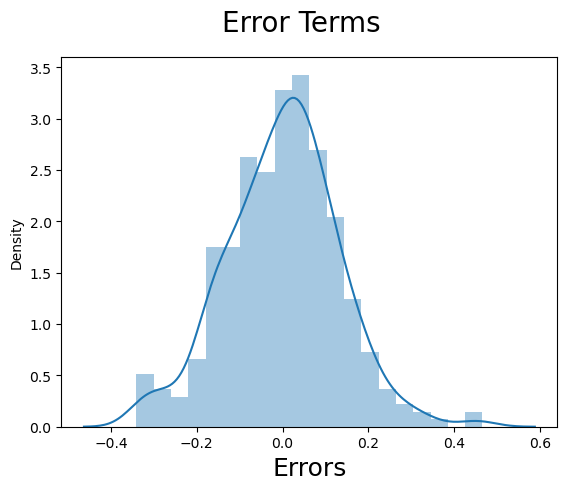

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the training data
y_train_price = model.predict(X_train)

# Plotting the distribution of error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins=20)
fig.suptitle('Error Terms', fontsize=20)  # Plot heading
plt.xlabel('Errors', fontsize=18)
plt.show()
